In [131]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"

response = requests.get(url)

data = StringIO(response.text)
df = pd.read_csv(data)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


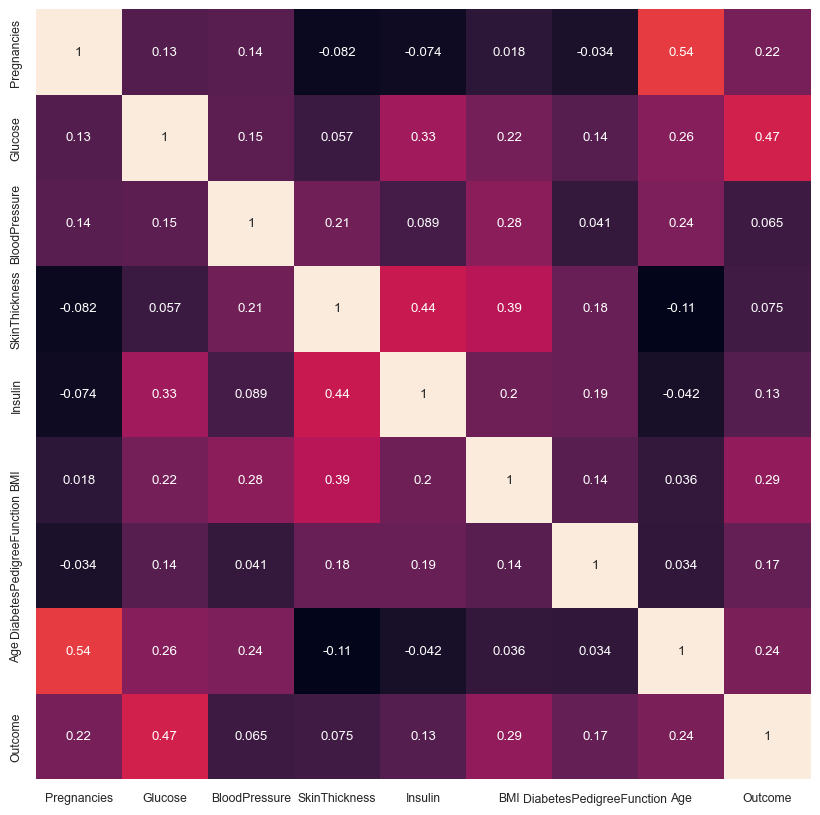

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [135]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [137]:
X = df.drop(["BMI", "Outcome"], axis=1).to_numpy()
Y = df['Outcome'].to_numpy()

print(X)
print("\n\n",Y)

[[  6.    148.     72.    ...   0.      0.627  50.   ]
 [  1.     85.     66.    ...   0.      0.351  31.   ]
 [  8.    183.     64.    ...   0.      0.672  32.   ]
 ...
 [  5.    121.     72.    ... 112.      0.245  30.   ]
 [  1.    126.     60.    ...   0.      0.349  47.   ]
 [  1.     93.     70.    ...   0.      0.315  23.   ]]


 [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(537, 7) (537,)
(231, 7) (231,)


In [140]:
import numpy as np
from sklearn.linear_model import LinearRegression #1
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression() #1
model.fit(X_train, Y_train)

Y_preds = model.predict(X_test)

#사이킷런의 MSE 함수 사용
print('평균제곱오차 (sklearn):', mean_squared_error(Y_test, Y_preds))

#NumPy를 이용한 MSE 계산
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)
print('평균제곱오차 (NumPy):', mse_np(Y_test, Y_preds))

#리스트 컴프리헨션을 이용한 MSE 계산
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual.flatten(), predicted.flatten()))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱오차 (직접 계산):', mse(Y_test, Y_preds))

평균제곱오차 (sklearn): 0.17432801852050336
평균제곱오차 (NumPy): 0.17432801852050336
평균제곱오차 (직접 계산): 0.17432801852050347


기존변수: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,	BMI, DiabetesPedigreeFunction, Age, Outcome]
선택된 변수: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
평균제곱오차 (MSE): 0.17962291737261807


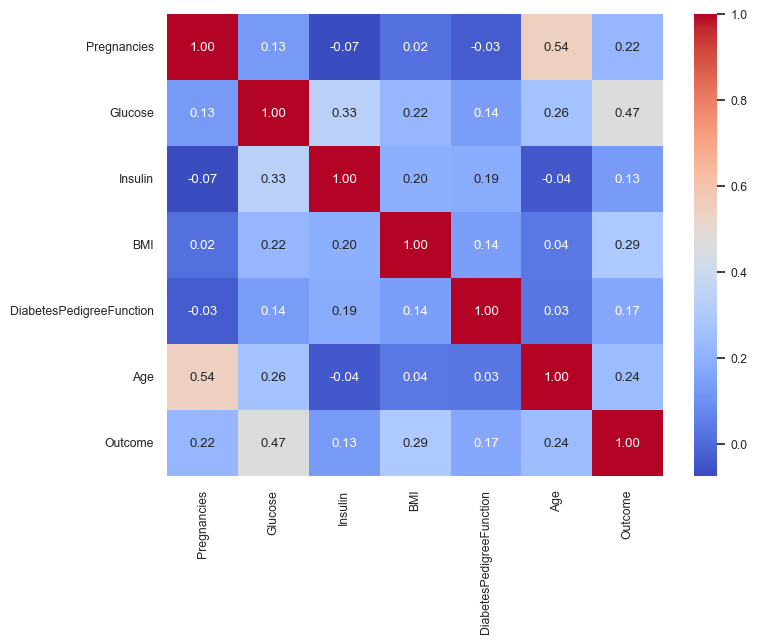

In [157]:
# 히트맵 참고하여 상관관계가 적은 것은 제외하고 학습

corr_matrix = df.corr()
target_corr = corr_matrix["Outcome"].abs()

threshold = 0.1
#상관관계가 0.2 이상인 것만 남김
selected_features = target_corr[target_corr > threshold].index.tolist()

selected_features.remove("Outcome")
print(f"기존변수: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,	BMI, DiabetesPedigreeFunction, Age, Outcome]")
print(f"선택된 변수: {selected_features}")

X = df[selected_features]
Y = df["Outcome"]
#남긴 변수로만 재입력

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression() #재학습
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

print(f"평균제곱오차 (MSE): {mse}")

# 8️⃣ 히트맵 시각화 (선택된 변수만)
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_features + ["Outcome"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()